In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

In [2]:
!head -n 10 datasets/babynames/yob1880.txt

head: datasets/babynames/yob1880.txt: No such file or directory


In [5]:
names1880 = pd.read_csv('./babynames/yob1880.txt',
                       names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [6]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [8]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = './babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)

In [9]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [10]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


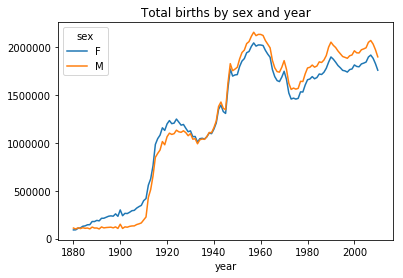

In [11]:
total_births.plot(title='Total births by sex and year')

In [12]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [13]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
            ... 
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [14]:
pieces = []

for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
    
top1000 = pd.concat(pieces, ignore_index=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


## 分析名字趋势

In [15]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1176f0710>,
      dtype=object)

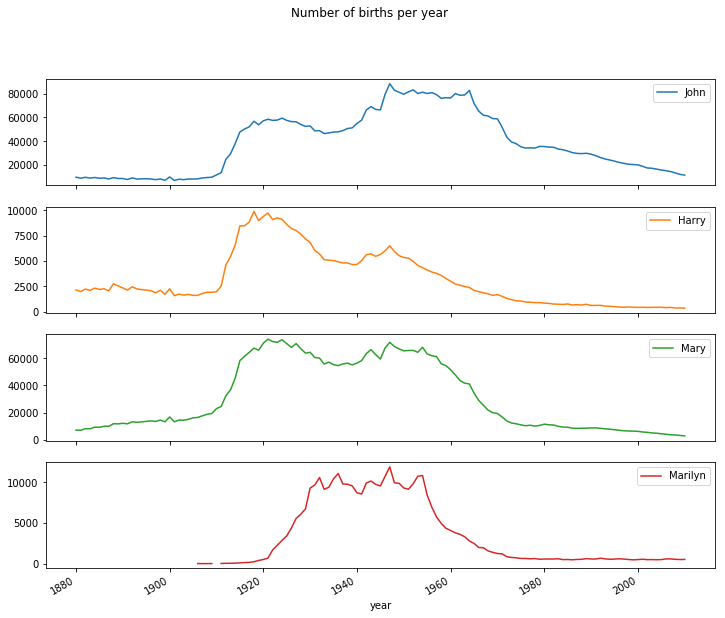

In [16]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, 
            title='Number of births per year')

### 计量命名多样性的增加

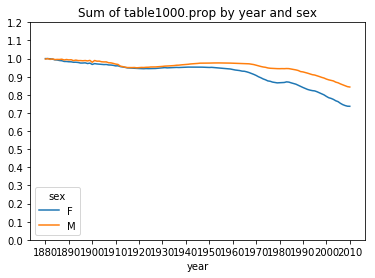

In [17]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [18]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [19]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [20]:
prop_cumsum.values.searchsorted(0.5)

116

In [21]:
df = boys[boys.year == 1900]
in1990 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1990.values.searchsorted(0.5) + 1

25

In [22]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [23]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


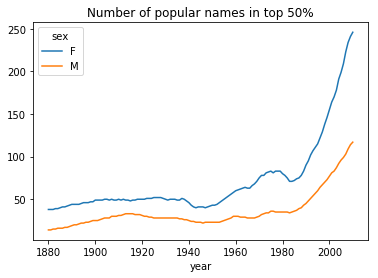

In [24]:
diversity.plot(title='Number of popular names in top 50%')

### 最后一个字母的革命

In [25]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

subtable = table.reindex(columns=[1990, 1960, 2010], level='year')
subtable.head()

sex                 F                             M                    
year             1990      1960      2010      1990      1960      2010
last_letter                                                            
a            718704.0  691247.0  670605.0   52158.0    5204.0   28438.0
b               155.0     694.0     450.0   27942.0    3912.0   38859.0
c               369.0      49.0     946.0   28951.0   15476.0   23125.0
d              2539.0    3729.0    2607.0  101968.0  262112.0   44398.0
e            338553.0  435013.0  313833.0  146489.0  178823.0  129012.0

In [26]:
subtable.sum()

sex  year
F    1990    1897256.0
     1960    2022062.0
     2010    1759010.0
M    1990    2052070.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [27]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1990      1960      2010      1990      1960      2010
last_letter                                                            
a            0.378812  0.341853  0.381240  0.025417  0.002440  0.014980
b            0.000082  0.000343  0.000256  0.013616  0.001834  0.020470
c            0.000194  0.000024  0.000538  0.014108  0.007257  0.012181
d            0.001338  0.001844  0.001482  0.049690  0.122908  0.023387
e            0.178443  0.215133  0.178415  0.071386  0.083853  0.067959
f            0.000016  0.000010  0.000055  0.000656  0.004325  0.001188
g            0.000364  0.000157  0.000374  0.002686  0.009488  0.001404
h            0.045092  0.036224  0.075852  0.030188  0.037907  0.051670
i            0.024054  0.039965  0.031734  0.004278  0.000603  0.022628
j            0.000010       NaN  0.000090  0.000231       NaN  0.000769
...               ...       ...       ...       ...       ...       ...
q                 NaN       NaN  0.000030  0.000084       NaN  0.000180
r            0.036489  0.006764  0.018025  0.077035  0.031034  0.087477
s            0.008353  0.012764  0.013332  0.084391  0.102730  0.065145
t            0.005239  0.015201  0.007830  0.036191  0.065655  0.022861
u            0.000202  0.000574  0.000417  0.000693  0.000057  0.001221
v            0.000003  0.000060  0.000117  0.000164  0.000037  0.001434
w            0.000206  0.000031  0.001182  0.040381  0.007711  0.016148
x            0.000299  0.000037  0.000727  0.004812  0.001851  0.008614
y            0.167607  0.152569  0.116828  0.104817  0.160987  0.058168
z            0.000815  0.000659  0.000704  0.001337  0.000184  0.001831

[26 rows x 6 columns]

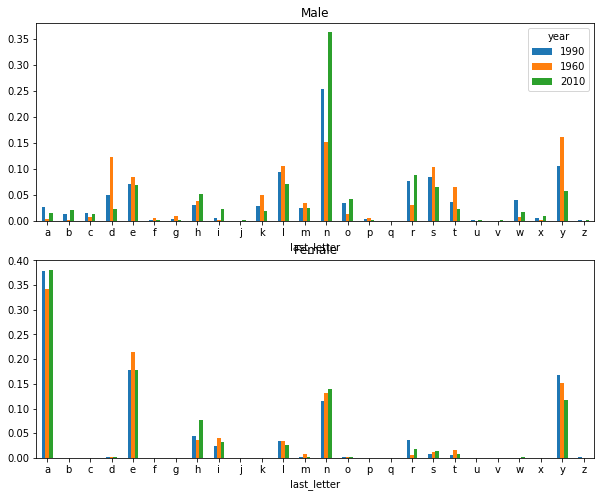

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [29]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


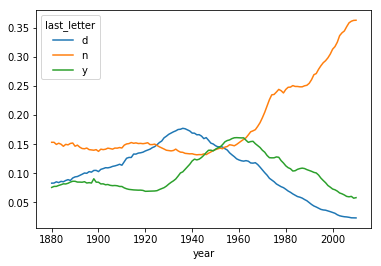

In [30]:
dny_ts.plot()

### 男孩名字变成女孩名字

In [35]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [36]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64